In [8]:
import os
from lxml import etree
from PIL import Image
from IPython.display import display
import ipywidgets as widgets
from pathlib import Path

In [9]:
project_root = Path("/Users/phapman/Desktop/tnh-scholar")
working_dir = project_root / "data_processing" / "processed_journal_data/phat-giao-viet-nam-1956-25-26"
image_dir_path = working_dir / "html_view/images"

In [10]:
# Paths (adjust these as needed)
xml_file_path = working_dir / "full_OCR_text_phat-giao-viet-nam-1956-25-26.xml"

# Load XML file
def load_xml(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        tree = etree.parse(file)
    return tree

# Save XML file
def save_xml(tree, file_path):
    with open(file_path, "wb") as file:
        tree.write(file, pretty_print=True, encoding="utf-8", xml_declaration=True)

# Extract OCR text and image paths
def extract_pages(tree, image_dir):
    pages = []
    for page in tree.xpath("//page"):
        page_number = page.get("page")
        print(f"processing page {page_number}")
        ocr_text = page.text.strip() if page.text else ""
        image_path = os.path.join(image_dir, f"page_{page_number}.jpg")  # Assuming images are named by page number
        if os.path.exists(image_path):
            pages.append({"number": page_number, "text": ocr_text, "image": image_path})
    return pages

# # Display text and image side by side with editing
# def edit_page(page, tree):
#     page_text_area = widgets.Textarea(
#         value=page["text"],
#         description=f"Page {page['number']}",
#         layout=widgets.Layout(width="100%", height="300px")
#     )

#     # Display image
#     img = Image.open(page["image"])
#     display(img)

#     # Display editable text area
#     display(page_text_area)

#     # Save button
#     save_button = widgets.Button(description="Save Changes")
#     output = widgets.Output()

#     def save_changes(_):
#         # Update XML with new text
#         page_element = tree.xpath(f"//page[@page='{page['number']}']")[0]
#         page_element.text = page_text_area.value
#         save_xml(tree, xml_file_path)
#         with output:
#             print(f"Page {page['number']} updated and saved!")

#     save_button.on_click(save_changes)
#     display(save_button, output)



In [11]:
from IPython.display import display, HTML, Javascript

def edit_page_with_save(page, tree):
    """
    Displays OCR text and corresponding image side by side with save functionality.
    """
    html_content = f"""
    <div style="display: flex; align-items: flex-start; gap: 20px;">
        <div>
            <img src="{page['image']}" alt="Page {page['number']} Image" style="max-width: 600px; border: 1px solid #ccc;">
        </div>
        <div style="flex-grow: 1;">
            <textarea id="text-area-{page['number']}" 
                      style="width: 100%; height: 300px; border: 1px solid #ccc; padding: 5px; font-family: monospace;">
{page['text']}
            </textarea>
            <button id="save-button-{page['number']}" 
                    style="margin-top: 10px; padding: 5px 10px; font-size: 14px;">Save Changes</button>
        </div>
    </div>
    <script>
        document.getElementById("save-button-{page['number']}").onclick = function() {{
            const text = document.getElementById("text-area-{page['number']}").value;
            const kernel = Jupyter.notebook.kernel;
            const command = "update_text_in_python(" + {page['number']} + ", `" + text.replace(/`/g, "\\`") + "`)";
            kernel.execute(command);
            alert("Saved changes for page {page['number']}!");
        }};
    </script>
    """
    display(HTML(html_content))

In [12]:
def update_text_in_python(page_number, new_text):
    # Update XML tree with new text
    page_element = tree.xpath(f"//page[@page='{page_number}']")[0]
    page_element.text = new_text
    save_xml(tree, xml_file_path)
    print(f"Saved changes for page {page_number}")

In [8]:
os.getcwd()

'/Users/phapman/Desktop/tnh-scholar/data_processing/processed_journal_data/phat-giao-viet-nam-1956-25-26'

In [12]:
os.path.exists("html_view/images/page_2.jpg")

True

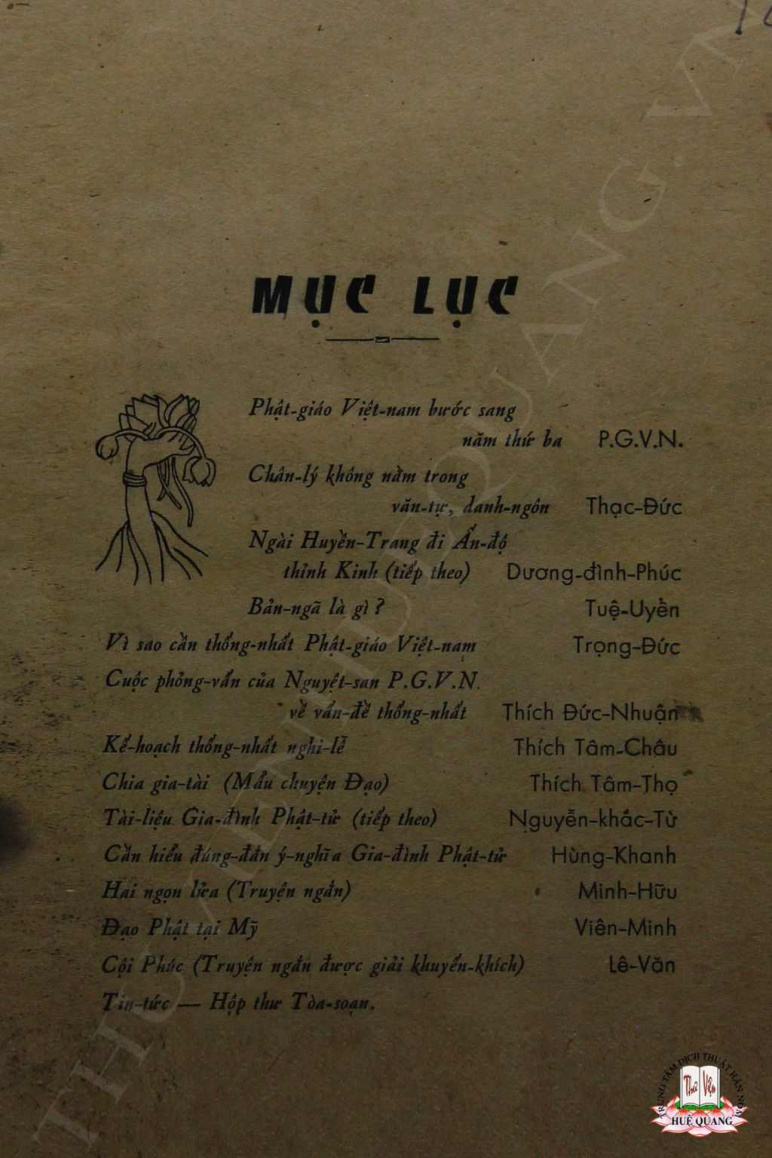

In [7]:
img = Image.open("html_view/images/page_2.jpg")
display(img)


In [10]:
# Main
tree = load_xml(xml_file_path)
pages = extract_pages(tree, image_dir_path)

processing page 1
processing page 2
processing page 3
processing page 4
processing page 5
processing page 6
processing page 7
processing page 8
processing page 9
processing page 10
processing page 11
processing page 12
processing page 13
processing page 14
processing page 15
processing page 16
processing page 17
processing page 18
processing page 19
processing page 20
processing page 21
processing page 22
processing page 23
processing page 24
processing page 25
processing page 26
processing page 27
processing page 28


In [11]:
pages

[{'number': '1',
  'text': 'PHÁT GIÁO\nVIỆT-NAM\nNGUYỆT -SAN\nA\nDICH THE\nSỐ 25 VÀ 26 ĐẶC SAN KỶ NIỆM MỞ ĐẦU NĂM THỨ BA\nSỐNG HỘI PHẬT - GIÁO VIỆT NAM XUẤT BẢN\n_ HUỆ QUANG',
  'image': 'html_view/images/page_1.jpg'},
 {'number': '2',
  'text': 'MUC LUC\nPhật-giáo Việt nam bước sang\nNG.V\nnăm thứ ba\nP.G.V.N.\nChân lý không nằm trong\nvăn tự, danh ngôn\nThạc Đức\nDương-đình-Phúc\nTuệ Uyển\nTrọng-Đức\nNgài Huyền-Trang đi Ấn độ\nthỉnh Kinh (tiếp theo)\nBản-ngã là gì ?\nVì sao cần thống nhất Phật-giáo Việt-nam\nCuộc phỏng vấn của Nguyệt-san P.G.VN.\nvề vấn đề thống nhất\nKế-hoạch thống nhất nghi lễ\nChia gia-lài (Mẫu chuyện Đạo)\nTài liệu Gia đình Phật-tử (tiếp theo)\nCần hiểu đúng đắn ý-nghĩa Gia đình Phật tử\nHai ngon bền (Truyện ngắn)\nThích Đức-Nhuận\nThích Tâm Châu\nThích Tâm-Thọ\nNguyễn-khắc-Từ\nHùng-Khanh\nMinh-Hữu\nĐạo Phật tại Mỹ\nViên-Minh\nCội Phúc (Truyện ngắn được giải khuyến khích)\nLê-Văn\nTin-tire-Hop the Toa-soan,\nTH\nDICH THU\nT\n_ HUỆ\nQUANG',
  'image': 'html_view/i

In [13]:
import streamlit as st
from PIL import Image

# Simulate OCR processing
def load_ocr_results(image_path):
    # Dummy OCR text for demonstration
    return "This is the OCR result for the image."

# Sidebar for selecting an image
st.sidebar.title("OCR Editor")
uploaded_file = st.sidebar.file_uploader("Upload an Image", type=["jpg", "jpeg", "png", "pdf"])

if uploaded_file:
    # Display the image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Display OCR text in an editable field
    ocr_text = load_ocr_results(uploaded_file)
    edited_text = st.text_area("Edit OCR Text", ocr_text, height=300)

    # Save button
    if st.button("Save Changes"):
        # Replace with your saving logic
        st.write("Saved changes!")
        # For example, save to file
        with open("ocr_output.txt", "w") as f:
            f.write(edited_text)

else:
    st.write("Upload an image to begin.")

2024-11-18 13:28:52.316 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 13:28:52.378 
  command:

    streamlit run /opt/anaconda3/envs/tnh-scholar/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-11-18 13:28:52.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 13:28:52.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 13:28:52.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 13:28:52.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 13:28:52.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 13:28:52.380 Threa